In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For notebook visuals
%matplotlib inline
sns.set(style='whitegrid')


In [2]:
df = pd.read_csv("Weather-related disease prediction.csv")
df.head()


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [3]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (5200, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14

In [5]:
df.describe()


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Jitesh\AppData\Local\Temp\ipykernel_9848\13686319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


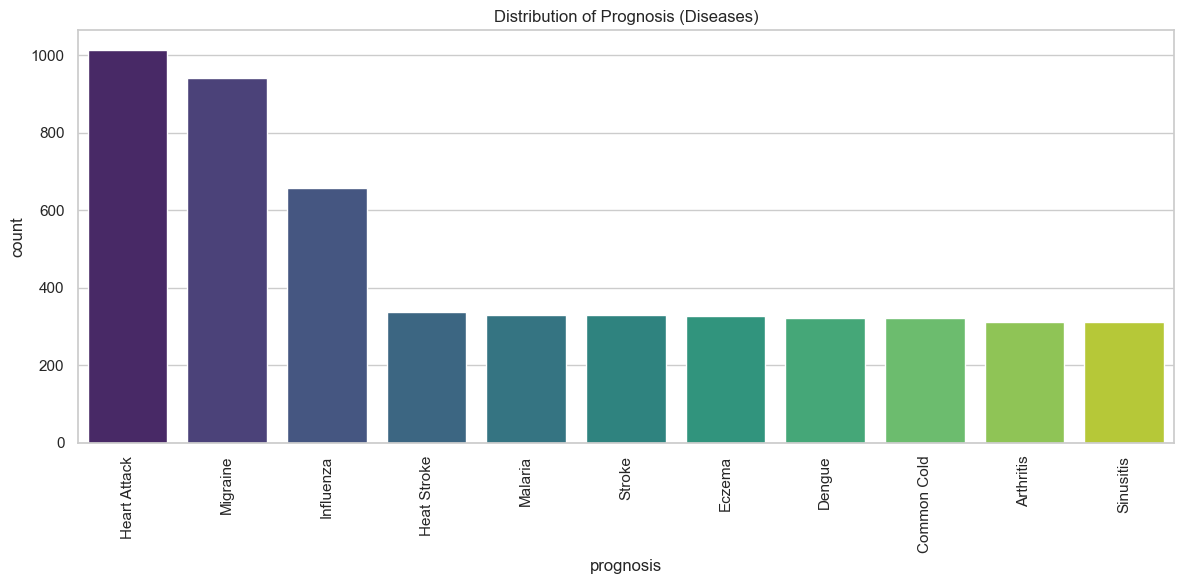

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='prognosis',
    order=df['prognosis'].value_counts().index,
    palette='viridis'  # You can also try 'Set2', 'coolwarm', 'husl', etc.
)
plt.xticks(rotation=90)
plt.title("Distribution of Prognosis (Diseases)")
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

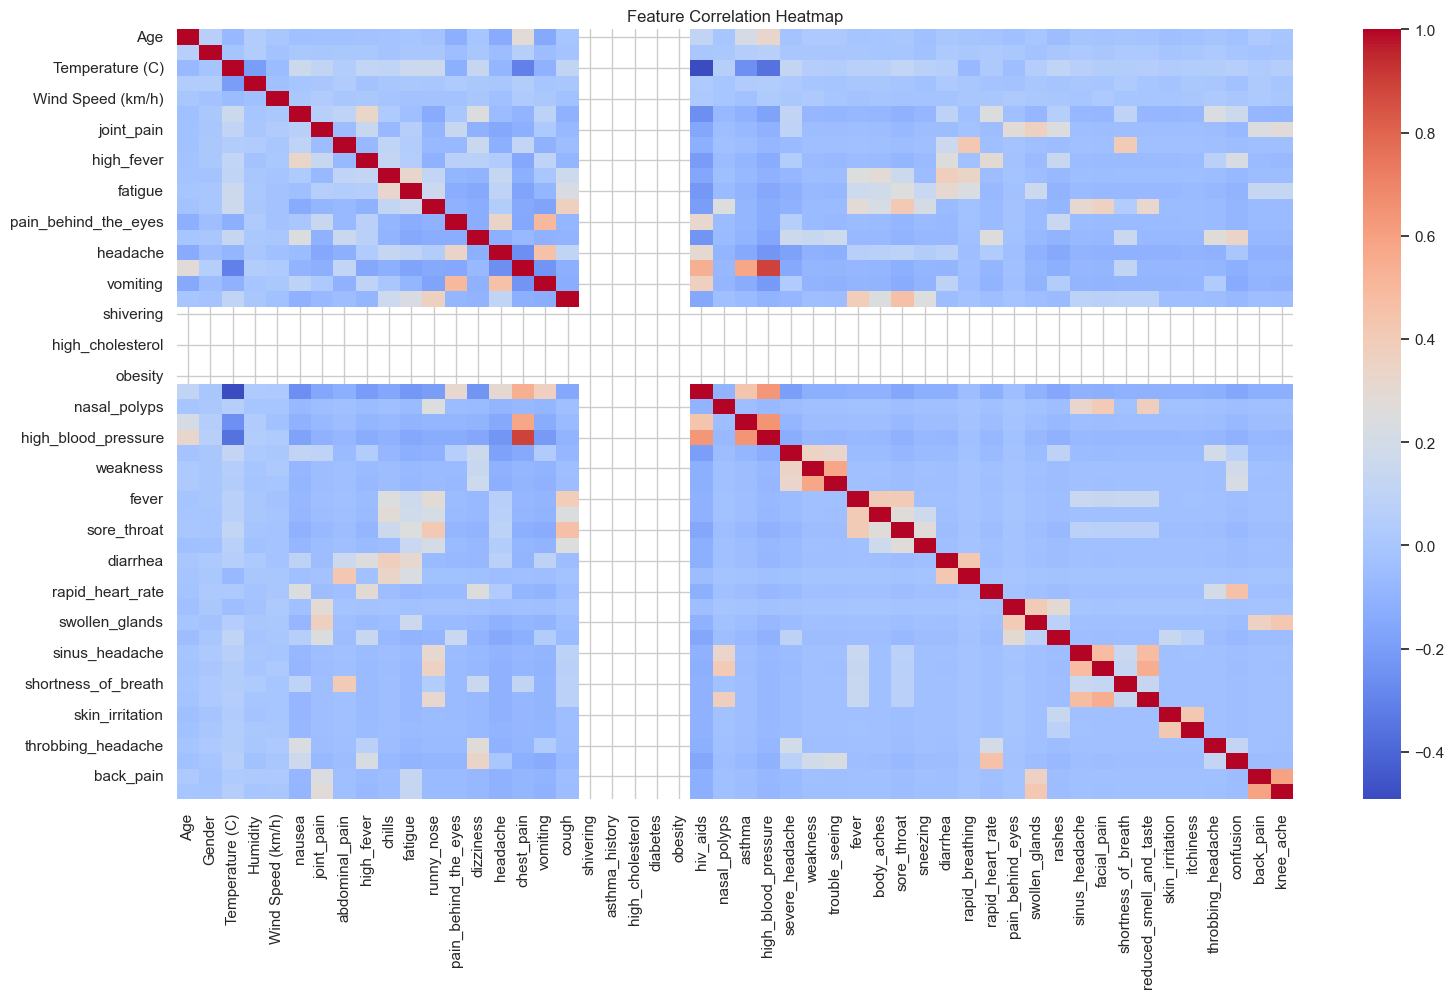

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
correlation = numeric_df.corr()

# Plot heatmap
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


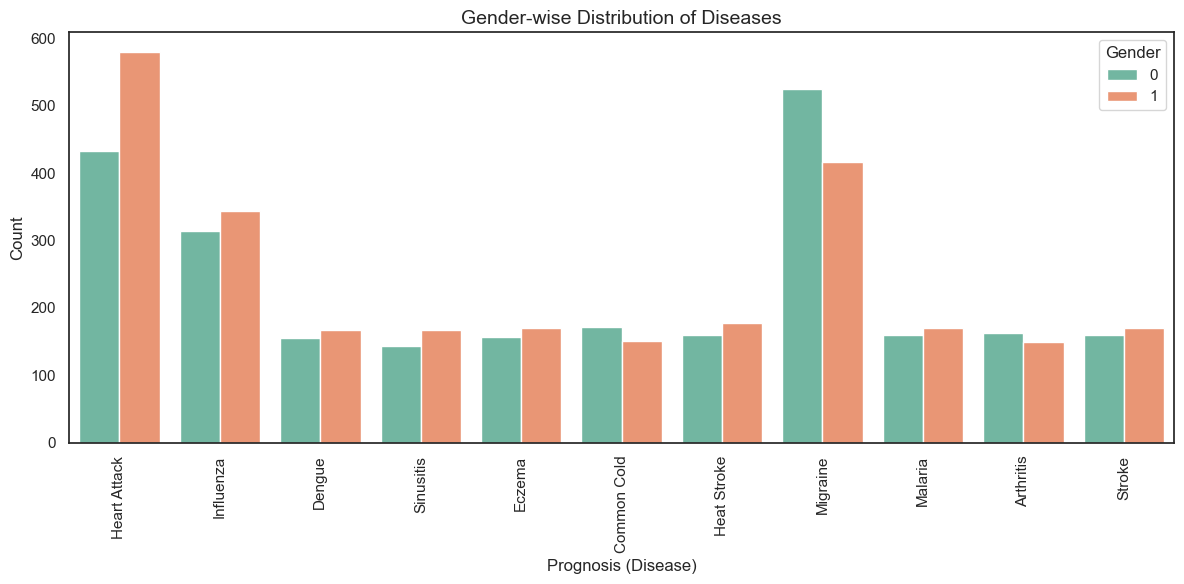

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use a visually distinct palette
sns.countplot(x='prognosis', hue='Gender', data=df, palette='Set2')  # Try 'Set1', 'pastel', or 'husl' too

plt.xticks(rotation=90)
plt.title("Gender-wise Distribution of Diseases", fontsize=14)
plt.xlabel("Prognosis (Disease)")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\Jitesh\AppData\Local\Temp\ipykernel_9848\376589435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prognosis', y='Age', data=df, palette='coolwarm')  # Try 'Set3', 'husl', 'Paired'


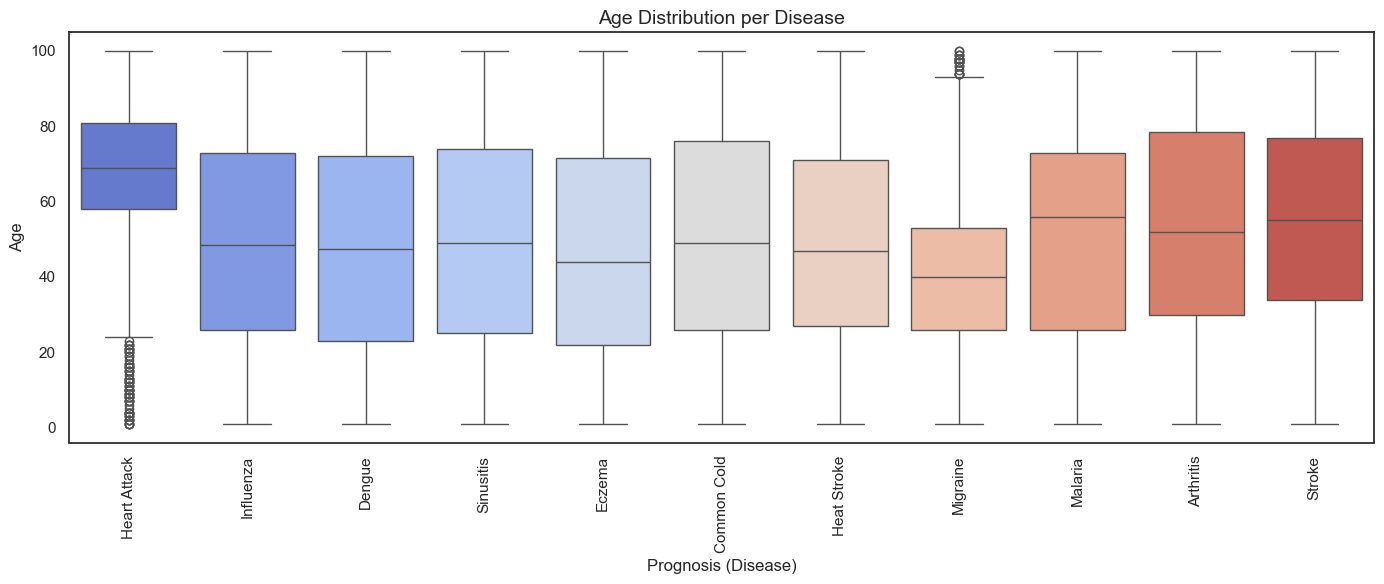

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Use a pleasing color palette
sns.boxplot(x='prognosis', y='Age', data=df, palette='coolwarm')  # Try 'Set3', 'husl', 'Paired'

plt.xticks(rotation=90)
plt.title("Age Distribution per Disease", fontsize=14)
plt.xlabel("Prognosis (Disease)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


C:\Users\Jitesh\AppData\Local\Temp\ipykernel_9848\3130511782.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prognosis', y='Temperature (C)', data=df, palette='Spectral')  # Try 'Set2', 'husl', or 'cubehelix' too


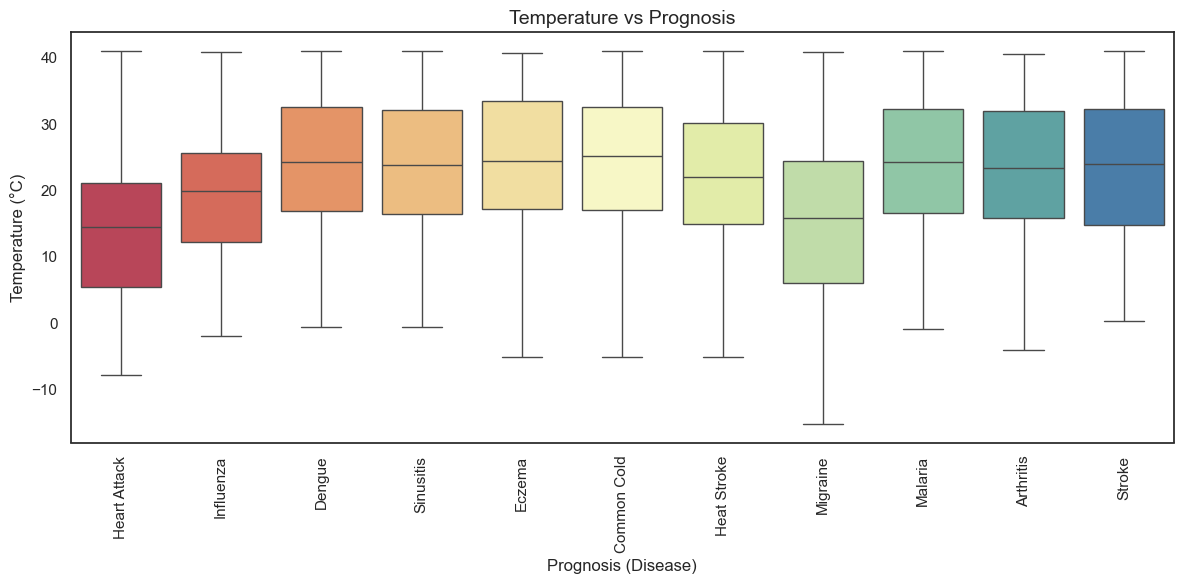

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use a high-contrast, colorful palette
sns.boxplot(x='prognosis', y='Temperature (C)', data=df, palette='Spectral')  # Try 'Set2', 'husl', or 'cubehelix' too

plt.xticks(rotation=90)
plt.title("Temperature vs Prognosis", fontsize=14)
plt.xlabel("Prognosis (Disease)")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


C:\Users\Jitesh\AppData\Local\Temp\ipykernel_9848\3194354848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


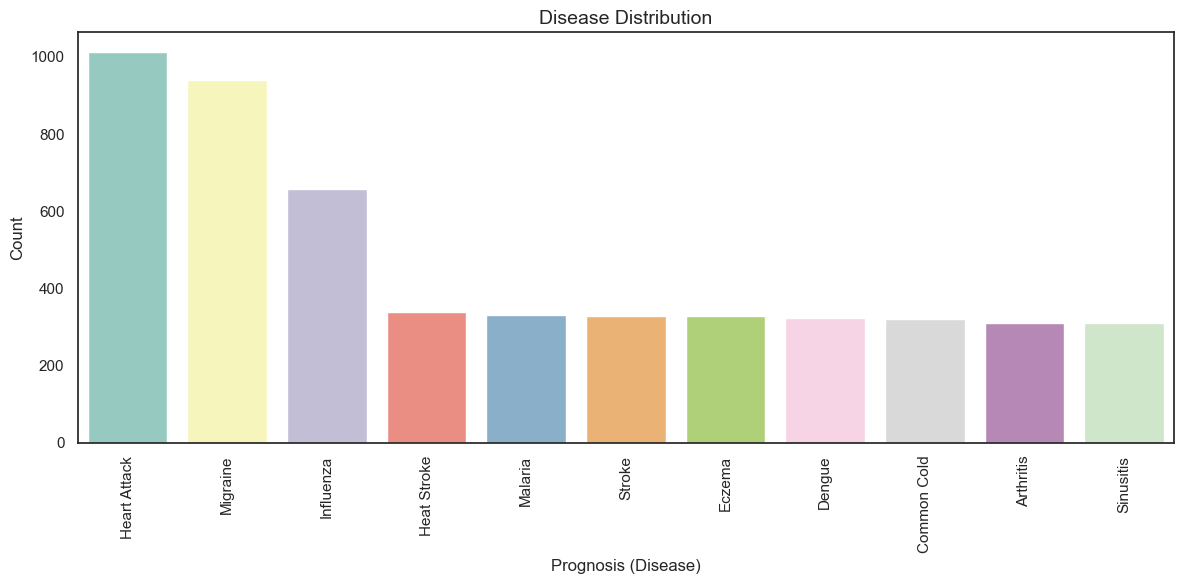

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use a vibrant color palette
sns.countplot(
    data=df,
    x='prognosis',
    order=df['prognosis'].value_counts().index,
    palette='Set3'  # Try 'husl', 'Spectral', 'tab20', or custom list
)

plt.xticks(rotation=90)
plt.title("Disease Distribution", fontsize=14)
plt.xlabel("Prognosis (Disease)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [18]:
X = df.drop(columns=['prognosis'])
y = df['prognosis']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        58
 Common Cold       0.91      0.98      0.94        59
      Dengue       0.98      0.98      0.98        58
      Eczema       1.00      1.00      1.00        68
Heart Attack       1.00      0.99      1.00       192
 Heat Stroke       0.97      1.00      0.99        71
   Influenza       0.99      0.96      0.97       136
     Malaria       1.00      0.98      0.99        61
    Migraine       0.98      1.00      0.99       201
   Sinusitis       1.00      1.00      1.00        57
      Stroke       0.99      0.95      0.97        79

    accuracy                           0.99      1040
   macro avg       0.98      0.99      0.98      1040
weighted avg       0.99      0.99      0.99      1040



<Figure size 2000x1200 with 0 Axes>

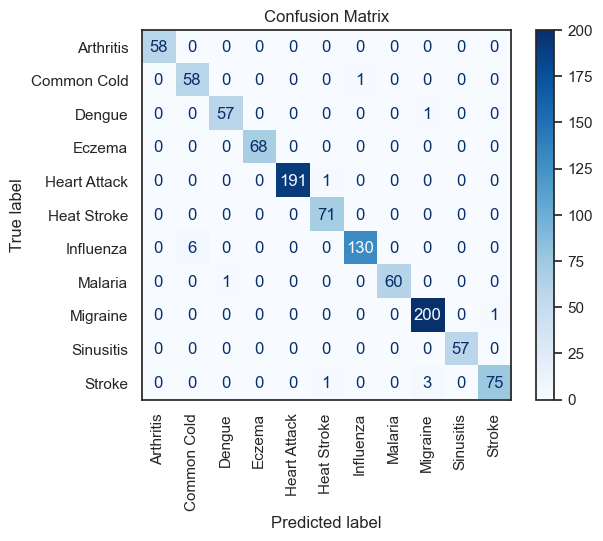

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot
plt.figure(figsize=(20, 12))
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()
